In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# define dataset path
# path = "./images/train"
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
path = root_dir + 'Colab Notebooks/CSEE5590_DeepLearning/'

Mounted at /content/gdrive


In [4]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [5]:
np.random.seed(42)
data_path = Path(path + '/images')
img_data = ImageDataBunch.from_folder(data_path, train = "train", valid = "validation",
        ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]


In [6]:
img_data.valid_ds

LabelList (7196 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fear,fear,fear,fear,fear
Path: /content/gdrive/My Drive/Colab Notebooks/CSEE5590_DeepLearning/images

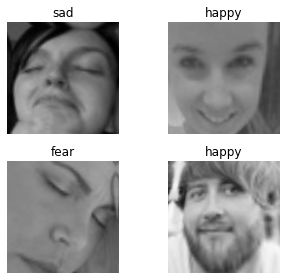

In [7]:
img_data.show_batch(rows = 2, figsize = (5,4))

In [8]:
print(img_data.classes)
len(img_data.classes),img_data.c

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


(7, 7)

In [9]:
model = cnn_learner(img_data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [10]:
model.fit_one_cycle(15, max_lr = slice(1e-4,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,2.878097,1.981182,0.280850,40:58
1,2.354636,1.686668,0.390495,02:03
2,1.998546,1.502255,0.439967,02:01
3,1.676824,1.382306,0.481518,02:01
4,1.493194,1.283140,0.510283,01:58
5,1.371339,1.222944,0.542107,02:01
6,1.290980,1.178066,0.552668,02:01
7,1.245183,1.146084,0.570178,02:00
8,1.201076,1.114494,0.581017,02:03
9,1.196471,1.098035,0.585881,02:03


In [11]:
y_pred = ClassificationInterpretation.from_learner(model)

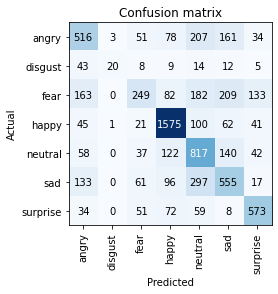

In [12]:
y_pred.plot_confusion_matrix()

In [34]:
model.export()

In [35]:
loaded_model = load_learner(path, 'export.pkl')